In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [3]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [4]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11460608/11490434 [============================>.] - ETA: 0s

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.3756 - val_loss: 0.2730
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.2655 - val_loss: 0.2548
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.2446 - val_loss: 0.2324
Epoch 4/50
60000/60000 [==============================] - 7s - loss: 0.2248 - val_loss: 0.2149
Epoch 5/50
60000/60000 [==============================] - 6s - loss: 0.2096 - val_loss: 0.2017
Epoch 6/50
60000/60000 [==============================] - 6s - loss: 0.1981 - val_loss: 0.1917
Epoch 7/50
60000/60000 [==============================] - 5s - loss: 0.1892 - val_loss: 0.1839
Epoch 8/50
60000/60000 [==============================] - 5s - loss: 0.1821 - val_loss: 0.1774
Epoch 9/50
60000/60000 [==============================] - 5s - loss: 0.1762 - val_loss: 0.1722
Epoch 10/50
60000/60000 [==============================] - 5s - loss: 0.1712 - val_loss: 0.1676

In [10]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

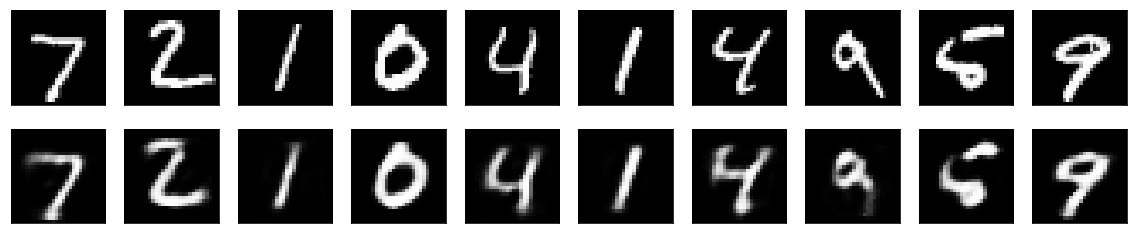

In [11]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

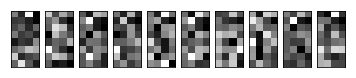

In [12]:
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##  Con curvas de luz

### ATLAS DATASET

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df_mira = pd.read_csv('ATLAS_LC/MIRA_features_table.csv')
signature_cols = [col for col in df_mira.columns if 'Signature' in col]
signature_cols += ['OBJID', 'filter', 'CLASS']
df_mira = df_mira[signature_cols]

In [6]:
df_mpulse = pd.read_csv('ATLAS_LC/MPULSE_features_table.csv')[signature_cols]
df_dbf = pd.read_csv('ATLAS_LC/DBF_features_table.csv')[signature_cols]
df_lpv = pd.read_csv('ATLAS_LC/LPV_features_table.csv')[signature_cols]
df_dbh = pd.read_csv('ATLAS_LC/DBH_features_table.csv')[signature_cols]
df_pulse = pd.read_csv('ATLAS_LC/PULSE_features_table.csv')[signature_cols]
df_nsine = pd.read_csv('ATLAS_LC/NSINE_features_table.csv')[signature_cols]
df_sine = pd.read_csv('ATLAS_LC/SINE_features_table.csv')[signature_cols]
df_msine = pd.read_csv('ATLAS_LC/MSINE_features_table.csv')[signature_cols]
df_cbh = pd.read_csv('ATLAS_LC/CBH_features_table.csv')[signature_cols]
df_cbf = pd.read_csv('ATLAS_LC/CBF_features_table.csv')[signature_cols]
df_irr = pd.read_csv('ATLAS_LC/IRR_features_table.csv')[signature_cols]

In [7]:
full_data = pd.concat([df_mira, df_mpulse, df_dbf, df_lpv, df_dbh, df_pulse, 
                       df_nsine, df_sine, df_msine, df_cbf, df_cbh])
signature_cols = [col for col in df_mira.columns if 'Signature' in col]
X = full_data[signature_cols].as_matrix()

/home/bruno/.virtualenvs/iPTF/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [8]:
del(df_mira)

In [9]:
del(df_mpulse)

In [10]:
del(df_dbf)

In [11]:
del(df_lpv)

In [12]:
del(df_dbh)

In [13]:
del(df_pulse)

In [14]:
del(df_cbf)

In [15]:
del(df_cbh)

In [16]:
del(df_nsine)

In [17]:
del(df_sine)

In [18]:
del(df_msine)

In [19]:
del(df_irr)

In [20]:
X_train, X_test = train_test_split(X, test_size=0.10, random_state=17)

In [21]:
print X_train.shape
print X_test.shape

(326278, 216)
(36254, 216)


In [42]:
## this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(216,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(216, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [43]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [44]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [45]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [46]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=5000,
                shuffle=True,
                validation_data=(X_test, X_test))

autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=9000,
                shuffle=True,
                validation_data=(X_test, X_test))

autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=2500,
                shuffle=True,
                validation_data=(X_test, X_test))

autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=5000,
                shuffle=True,
                validation_data=(X_test, X_test))


Train on 326278 samples, validate on 36254 samples
Epoch 1/50
326278/326278 [==============================] - 6s - loss: 0.5994 - val_loss: 0.3890
Epoch 2/50
326278/326278 [==============================] - 6s - loss: 0.1238 - val_loss: -0.1334
Epoch 3/50
326278/326278 [==============================] - 6s - loss: -0.2971 - val_loss: -0.4721
Epoch 4/50
326278/326278 [==============================] - 6s - loss: -0.5885 - val_loss: -0.7135
Epoch 5/50
326278/326278 [==============================] - 6s - loss: -0.7929 - val_loss: -0.8798
Epoch 6/50
326278/326278 [==============================] - 6s - loss: -0.9309 - val_loss: -0.9930
Epoch 7/50
326278/326278 [==============================] - 6s - loss: -1.0300 - val_loss: -1.0804
Epoch 8/50
326278/326278 [==============================] - 7s - loss: -1.1091 - val_loss: -1.1514
Epoch 9/50
326278/326278 [==============================] - 6s - loss: -1.1740 - val_loss: -1.2100
Epoch 10/50
326278/326278 [==============================] - 

326278/326278 [==============================] - 6s - loss: -1.6661 - val_loss: -1.6707
Epoch 2/20
326278/326278 [==============================] - 6s - loss: -1.6667 - val_loss: -1.6710
Epoch 3/20
326278/326278 [==============================] - 6s - loss: -1.6673 - val_loss: -1.6719
Epoch 4/20
326278/326278 [==============================] - 5s - loss: -1.6679 - val_loss: -1.6723
Epoch 5/20
326278/326278 [==============================] - 5s - loss: -1.6685 - val_loss: -1.6731
Epoch 6/20
326278/326278 [==============================] - 6s - loss: -1.6691 - val_loss: -1.6737
Epoch 7/20
326278/326278 [==============================] - 6s - loss: -1.6697 - val_loss: -1.6742
Epoch 8/20
326278/326278 [==============================] - 6s - loss: -1.6704 - val_loss: -1.6747
Epoch 9/20
326278/326278 [==============================] - 6s - loss: -1.6709 - val_loss: -1.6753
Epoch 10/20
326278/326278 [==============================] - 6s - loss: -1.6715 - val_loss: -1.6760
Epoch 11/20
326278/3

In [47]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
# encode and decode some lightcurves
# note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

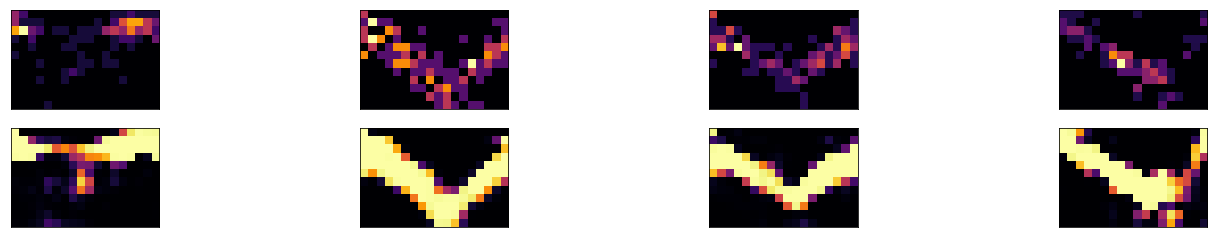

In [48]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 4  # how many digits we will display
plt.figure(figsize=(24, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    j = np.random.randint(0, high=len(X_test))
    plt.imshow(X_test[j].reshape(18, 12).T, cmap='inferno')
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[j].reshape(18, 12).T, cmap='inferno')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [49]:
# encode every data 
encoded_imgs = encoder.predict(X)

In [50]:
encoded_imgs.shape

(362532, 32)

In [51]:
enc = pd.DataFrame()
enc['OBJID'] = full_data['OBJID']
enc['filter'] = full_data['filter']
enc['CLASS'] = full_data['CLASS']
for i in range(encoding_dim):
    enc['encode_{}'.format(i+1)] = encoded_imgs[:, i]
enc.to_csv('ATLAS_LC/signatures_{}_encoded.csv'.format(encoded.shape[1]))

In [212]:
enc

,OBJID,filter,CLASS,encode_1,encode_2,encode_3,encode_4,encode_5,encode_6,encode_7,encode_8,encode_9,encode_10,encode_11,encode_12,encode_13,encode_14,encode_15,encode_16
0,8.756263e+16,c,MIRA,0.000000,0.000000,40.220776,336.721008,82.547630,38.915081,74.268440,105.115280,29.269661,47.805931,36.730053,9.723154,0.000000,51.673851,71.604446,28.513775
1,1.232128e+17,c,MIRA,14.778156,19.635433,0.000000,198.213348,27.869883,32.023434,20.488991,109.037994,0.000000,21.767908,49.728687,8.013769,25.502790,35.302757,26.231499,41.401054
2,8.684271e+16,c,MIRA,14.750517,8.584417,28.986626,331.828308,55.907661,9.306194,42.841953,86.873291,4.814669,45.091660,72.552834,15.134164,6.896567,52.581211,37.785271,27.721138
3,9.259280e+16,c,MIRA,14.294035,0.000000,22.084637,247.401978,26.170912,43.595749,54.307011,72.370537,3.537352,48.392071,23.857714,0.904099,0.000000,31.099239,12.879484,35.439678
4,8.767266e+16,c,MIRA,5.533474,0.000000,14.531010,141.571869,7.674263,19.418148,84.463409,74.978867,8.586517,20.990602,26.324255,0.323762,3.540833,0.000000,33.450390,24.233498
5,9.405266e+16,c,MIRA,2.182894,15.177378,18.751123,129.916061,49.866810,29.119293,0.000000,84.426414,9.825982,18.275341,59.830593,0.000000,10.730834,32.102154,33.089176,4.943291
6,1.038128e+17,c,MIRA,13.835340,16.104973,29.369650,220.939651,32.232979,23.104280,25.139009,85.431328,16.404484,23.719509,67.341850,8.862018,16.320877,35.345200,79.061058,15.094724
7,7.923260e+16,c,MIRA,19.241953,14.425549,26.609470,207.872025,28.937883,35.453945,16.578161,108.094444,8.336200,16.942289,71.461319,7.813332,36.975956,36.122513,67.606155,8.130115
8,7.706109e+16,c,MIRA,10.661039,0.000000,38.709484,132.139801,24.485403,26.688658,40.201538,75.754898,15.637185,0.000000,9.914756,11.801835,23.124187,28.167589,0.000000,10.542234
9,9.327271e+16,c,MIRA,0.000000,9.038069,21.475845,194.960541,54.718281,39.164326,23.400055,108.671638,11.601582,30.452971,56.924397,2.053812,9.374201,48.418533,41.493679,10.580890


Now with the deltamdeltat diagrams

In [52]:
df_mira = pd.read_csv('ATLAS_LC/MIRA_features_table.csv')
signature_cols = [col for col in df_mira.columns if 'Deltam' in col]
#plt.imshow(df_mira[signature_cols].iloc[2787].as_matrix().reshape(23, 24).T, cmap='inferno')
#plt.show()

In [53]:
signature_cols += ['OBJID', 'filter', 'CLASS']
df_mira = df_mira[signature_cols]

In [54]:
df_mpulse = pd.read_csv('ATLAS_LC/MPULSE_features_table.csv')[signature_cols]
df_dbf = pd.read_csv('ATLAS_LC/DBF_features_table.csv')[signature_cols]
df_lpv = pd.read_csv('ATLAS_LC/LPV_features_table.csv')[signature_cols]
df_dbh = pd.read_csv('ATLAS_LC/DBH_features_table.csv')[signature_cols]
df_pulse = pd.read_csv('ATLAS_LC/PULSE_features_table.csv')[signature_cols]
df_nsine = pd.read_csv('ATLAS_LC/NSINE_features_table.csv')[signature_cols]
df_sine = pd.read_csv('ATLAS_LC/SINE_features_table.csv')[signature_cols]
df_msine = pd.read_csv('ATLAS_LC/MSINE_features_table.csv')[signature_cols]
df_cbh = pd.read_csv('ATLAS_LC/CBH_features_table.csv')[signature_cols]
df_cbf = pd.read_csv('ATLAS_LC/CBF_features_table.csv')[signature_cols]
df_irr = pd.read_csv('ATLAS_LC/IRR_features_table.csv')[signature_cols]

In [55]:
full_data = pd.concat([df_mira, df_mpulse, df_dbf, df_lpv, df_dbh, df_pulse, 
                       df_nsine, df_sine, df_msine, df_cbf, df_cbh])
signature_cols = [col for col in df_mira.columns if 'Deltam' in col]
X = full_data[signature_cols].as_matrix()

/home/bruno/.virtualenvs/iPTF/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [56]:
del(df_mira)

In [57]:
del(df_mpulse)

In [58]:
del(df_dbf)

In [59]:
del(df_lpv)

In [60]:
del(df_dbh)

In [61]:
del(df_pulse)

In [62]:
del(df_cbf)

In [63]:
del(df_cbh)

In [64]:
del(df_nsine)

In [65]:
del(df_sine)

In [66]:
del(df_msine)

In [67]:
del(df_irr)

In [68]:
X_train, X_test = train_test_split(X, test_size=0.10, random_state=17)

In [69]:
print X_train.shape
print X_test.shape

(326278, 552)
(36254, 552)


In [90]:
## this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(23*24,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(23*24, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [91]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [92]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [93]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [94]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=5000,
                shuffle=True,
                validation_data=(X_test, X_test))

autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=9000,
                shuffle=True,
                validation_data=(X_test, X_test))

autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=2500,
                shuffle=True,
                validation_data=(X_test, X_test))

autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=5000,
                shuffle=True,
                validation_data=(X_test, X_test))


Train on 326278 samples, validate on 36254 samples
Epoch 1/50
326278/326278 [==============================] - 15s - loss: -3.4727 - val_loss: -5.5617
Epoch 2/50
326278/326278 [==============================] - 15s - loss: -5.6896 - val_loss: -5.7509
Epoch 3/50
326278/326278 [==============================] - 14s - loss: -5.7793 - val_loss: -5.7980
Epoch 4/50
326278/326278 [==============================] - 14s - loss: -5.8179 - val_loss: -5.8279
Epoch 5/50
326278/326278 [==============================] - 14s - loss: -5.8398 - val_loss: -5.8429
Epoch 6/50
326278/326278 [==============================] - 15s - loss: -5.8523 - val_loss: -5.8537
Epoch 7/50
326278/326278 [==============================] - 15s - loss: -5.8630 - val_loss: -5.8657
Epoch 8/50
326278/326278 [==============================] - 15s - loss: -5.8775 - val_loss: -5.8788
Epoch 9/50
326278/326278 [==============================] - 15s - loss: -5.8911 - val_loss: -5.8996
Epoch 10/50
326278/326278 [======================

326278/326278 [==============================] - 17s - loss: -6.0383 - val_loss: -6.0351
Train on 326278 samples, validate on 36254 samples
Epoch 1/20
326278/326278 [==============================] - 15s - loss: -6.0391 - val_loss: -6.0352
Epoch 2/20
326278/326278 [==============================] - 15s - loss: -6.0395 - val_loss: -6.0358
Epoch 3/20
326278/326278 [==============================] - 15s - loss: -6.0399 - val_loss: -6.0363
Epoch 4/20
326278/326278 [==============================] - 15s - loss: -6.0404 - val_loss: -6.0367
Epoch 5/20
326278/326278 [==============================] - 15s - loss: -6.0407 - val_loss: -6.0371
Epoch 6/20
326278/326278 [==============================] - 15s - loss: -6.0412 - val_loss: -6.0375
Epoch 7/20
326278/326278 [==============================] - 15s - loss: -6.0416 - val_loss: -6.0377
Epoch 8/20
326278/326278 [==============================] - 15s - loss: -6.0419 - val_loss: -6.0385
Epoch 9/20
326278/326278 [==============================] - 

In [95]:
# encode and decode some lightcurves
# note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

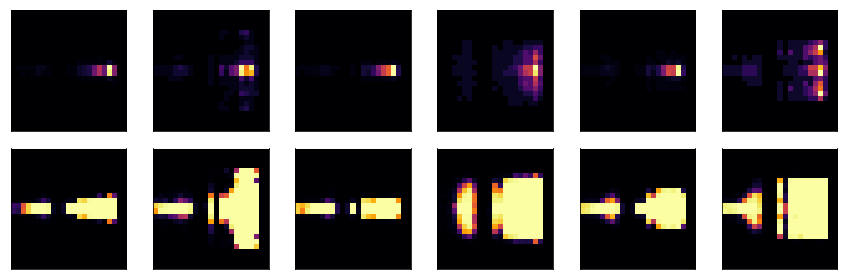

In [96]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 6  # how many digits we will display
plt.figure(figsize=(12, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    j = np.random.randint(0, high=len(X_test))
    plt.imshow(X_test[j].reshape(23, 24).T, cmap='inferno')
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[j].reshape(23, 24).T, cmap='inferno')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()

In [97]:
# encode every data 
encoded_imgs = encoder.predict(X)

In [98]:
encoded_imgs.shape

(362532, 64)

In [99]:
enc = pd.DataFrame()
enc['OBJID'] = full_data['OBJID']
enc['filter'] = full_data['filter']
enc['CLASS'] = full_data['CLASS']
for i in range(encoding_dim):
    enc['encode_{}'.format(i+1)] = encoded_imgs[:, i]
enc.to_csv('ATLAS_LC/deltamdeltat_{}_encoded.csv'.format(encoded.shape[1]))

### LINEAR Dataset

In [13]:
features = pd.read_pickle('features/features.pkl')

In [34]:
features = features.dropna(axis=0, how='any')

In [35]:
len(features.columns)

290

In [115]:
len(features)

7193

In [36]:
def from_ij_to_idx(i, j, n_i):
    idx = j * n_i + i
    return idx

def from_idx_to_ij(idx, n_i):
    frac = float(idx)/float(n_i)
    j = int(frac)
    i = int((frac - j) * n_i)
    return i, j

In [41]:
vartypes = ['RRLyrab', 'RRLyrc', 'Algol1', 'Algol2', 
            'CB', 'DScuti', 'LPVar', 'HBeat', 'BLHer', 
            'AnomCephei', 'Other']
types = features[['LCtype']]

In [117]:
rrlyab = features[features.LCtype==1]

In [256]:
rrlyab = features

In [257]:
len(rrlyab)

7193

In [258]:
def from_id_to_signature(starid, n_x=18, n_y=12):
    signature = np.empty((n_y, n_x))
    for x in range(n_x):
        for y in range(n_y):
            signature[y, x] = features.iloc[starid]['Signature_x_{}_y_{}'.format(x, y)]
    return signature

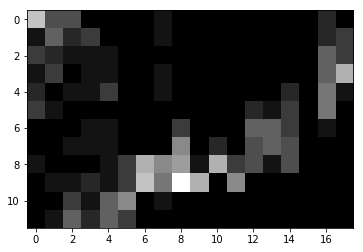

In [259]:
lc0 = from_id_to_signature(7)
plt.imshow(lc0)
plt.show()

In [260]:
cols = rrlyab.columns[rrlyab.columns.str.startswith('Signature')]

In [261]:
Xset = rrlyab[cols]

In [262]:
def from_row_to_sign(tablerow, n_x=18, n_y=12):
    signature = np.empty((n_y, n_x))
    for x in range(n_x):
        for y in range(n_y):
            signature[y, x] = tablerow['Signature_x_{}_y_{}'.format(x, y)]
    return signature

In [263]:
data = np.empty((len(Xset), 216))

for i in range(len(Xset)):
    sign = from_row_to_sign(Xset.iloc[i])
    sign = sign.reshape(216)
    data[i, :] = sign

newX = pd.DataFrame(data)

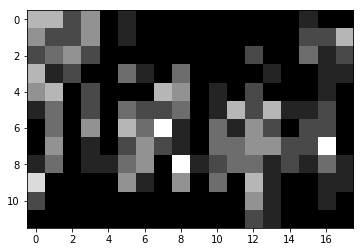

In [264]:
plt.imshow(from_row_to_sign(Xset.iloc[12]))
#.as_matrix().reshape(18, 12).T)
plt.show()

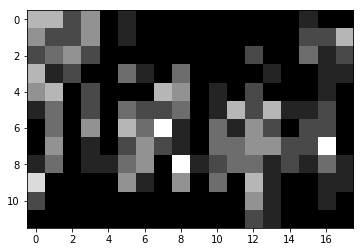

In [265]:
plt.imshow(newX.iloc[12].as_matrix().reshape(12, 18))
plt.show()

In [266]:
from sklearn.model_selection import train_test_split

In [267]:
X_train, X_test = train_test_split(newX, test_size=0.10, random_state=42)

In [268]:
X_train = X_train.as_matrix() 

In [269]:
X_test = X_test.as_matrix()

In [299]:
## this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(216,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(216, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [300]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [301]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [302]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [303]:
autoencoder.fit(X_train, X_train,
                epochs=80,
                batch_size=80,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 6473 samples, validate on 720 samples
Epoch 1/80
6473/6473 [==============================] - 1s 85us/step - loss: 0.6253 - val_loss: 0.5392
Epoch 2/80
6473/6473 [==============================] - 0s 30us/step - loss: 0.4503 - val_loss: 0.3690
Epoch 3/80
6473/6473 [==============================] - 0s 27us/step - loss: 0.2929 - val_loss: 0.2225
Epoch 4/80
6473/6473 [==============================] - 0s 29us/step - loss: 0.1731 - val_loss: 0.1275
Epoch 5/80
6473/6473 [==============================] - 0s 36us/step - loss: 0.0906 - val_loss: 0.0584
Epoch 6/80
6473/6473 [==============================] - 0s 36us/step - loss: 0.0263 - val_loss: 0.0027
Epoch 7/80
6473/6473 [==============================] - 0s 33us/step - loss: -0.0276 - val_loss: -0.0436
Epoch 8/80
6473/6473 [==============================] - 0s 29us/step - loss: -0.0730 - val_loss: -0.0822
Epoch 9/80
6473/6473 [==============================] - 0s 28us/step - loss: -0.1120 - val_loss: -0.1151
Epoch 10/80
6473/647

6473/6473 [==============================] - 0s 25us/step - loss: -0.4956 - val_loss: -0.4347
Epoch 79/80
6473/6473 [==============================] - 0s 24us/step - loss: -0.4960 - val_loss: -0.4356
Epoch 80/80
6473/6473 [==============================] - 0s 25us/step - loss: -0.4962 - val_loss: -0.4359


In [304]:
# encode and decode some lightcurves
# note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

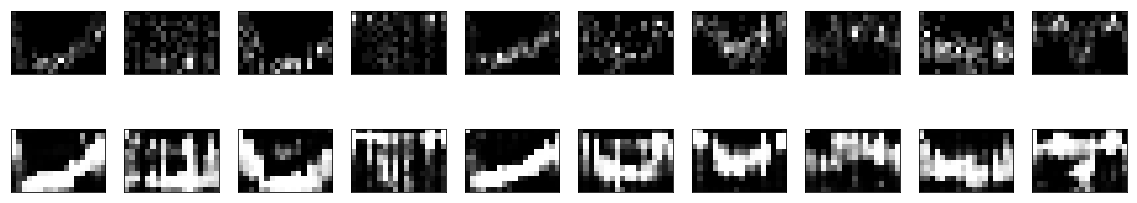

In [305]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(12, 18))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(12, 18))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

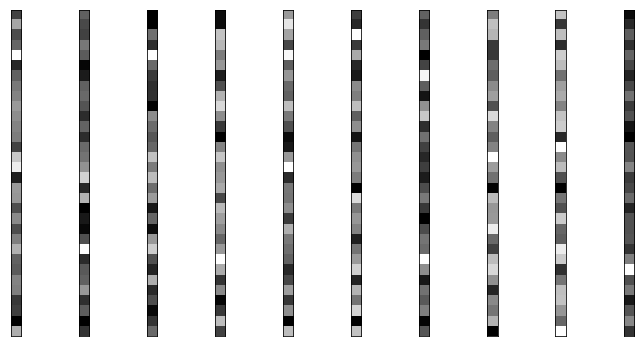

In [307]:
plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(32, 1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()